 **Name : Indra Awal Priyanto**

**Neptune ID : FDAW78**

In [1]:
#Download dataset from: https://drive.google.com/file/d/1nmobeX9BQMLGLnI4Fn_dPlCqqUwjYBLX/view?usp=sharing
!gdown --id 1nmobeX9BQMLGLnI4Fn_dPlCqqUwjYBLX
!unzip 1_prewitt.zip -d ./prewitt

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1nmobeX9BQMLGLnI4Fn_dPlCqqUwjYBLX
To: /content/1_prewitt.zip
100% 380k/380k [00:00<00:00, 46.9MB/s]
Archive:  1_prewitt.zip
  inflating: ./prewitt/circlegrey.png  
  inflating: ./prewitt/circlegrey.tif  
 extracting: ./prewitt/julia.png     
  inflating: ./prewitt/julia.tif     
  inflating: ./prewitt/motor.png     
  inflating: ./prewitt/motor.tif     


In [2]:
import cv2
import numpy as np
import glob
import matplotlib.pyplot as plt
import os
import skimage.exposure

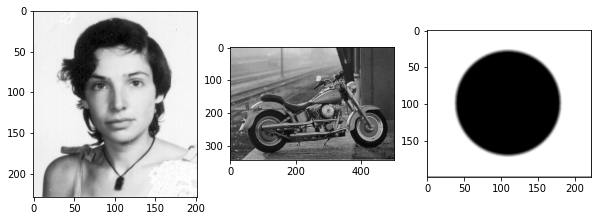

In [3]:
file = '/content/prewitt/*.png' 
glob.glob(file)
images = [cv2.imread(image) for image in glob.glob(file)]

fig=plt.figure(figsize=(10, 10))
rows, cols = 1, 3
# Display all of images
for j in range(0, len(images)):
  fig.add_subplot(rows, cols, j+1)
  plt.imshow(images[j])
plt.show()

In [116]:
from numpy import array, zeros, abs, sqrt, arctan2, arctan, pi, real
from numpy.fft import fft2, ifft2
from PIL import Image
from matplotlib.pyplot import imshow, show, subplot, figure, gray, title, axis

In [141]:
def magnitude(im):
    # Prewitt
    op1 = np.array([[-1, 0, 1], 
                     [-1, 0, 1], 
                     [-1, 0, 1]])
    op2 = np.array([[-1, -1, -1], 
                     [0, 0, 0], 
                     [1, 1, 1]])
    kernel1 = zeros(im.shape)
    kernel1[:op1.shape[0], :op1.shape[1]] = op1
    kernel1 = fft2(kernel1)

    kernel2 = zeros(im.shape)
    kernel2[:op2.shape[0], :op2.shape[1]] = op2
    kernel2 = fft2(kernel2)

    fim = fft2(im)
    Gx = real(ifft2(kernel1 * fim)).astype(float)
    Gy = real(ifft2(kernel2 * fim)).astype(float)

    G = sqrt(Gx**2 + Gy**2)
    Theta = arctan2(Gy, Gx) * 180 / pi
    return G, Theta

In [142]:
def non_max_supres(det, phase):
  gmax = zeros(det.shape)
  for i in range(gmax.shape[0]):
    for j in range(gmax.shape[1]):
      if phase[i][j] < 0:
        phase[i][j] += 360

      if ((j+1) < gmax.shape[1]) and ((j-1) >= 0) and ((i+1) < gmax.shape[0]) and ((i-1) >= 0):
        # 0 degrees
        if (phase[i][j] >= 337.5 or phase[i][j] < 22.5) or (phase[i][j] >= 157.5 and phase[i][j] < 202.5):
          if det[i][j] >= det[i][j + 1] and det[i][j] >= det[i][j - 1]:
            gmax[i][j] = det[i][j]
        # 45 degrees
        if (phase[i][j] >= 22.5 and phase[i][j] < 67.5) or (phase[i][j] >= 202.5 and phase[i][j] < 247.5):
          if det[i][j] >= det[i - 1][j + 1] and det[i][j] >= det[i + 1][j - 1]:
            gmax[i][j] = det[i][j]
        # 90 degrees
        if (phase[i][j] >= 67.5 and phase[i][j] < 112.5) or (phase[i][j] >= 247.5 and phase[i][j] < 292.5):
          if det[i][j] >= det[i - 1][j] and det[i][j] >= det[i + 1][j]:
            gmax[i][j] = det[i][j]
        # 135 degrees
        if (phase[i][j] >= 112.5 and phase[i][j] < 157.5) or (phase[i][j] >= 292.5 and phase[i][j] < 337.5):
          if det[i][j] >= det[i - 1][j - 1] and det[i][j] >= det[i + 1][j + 1]:
            gmax[i][j] = det[i][j]
  return gmax

<Figure size 432x288 with 0 Axes>

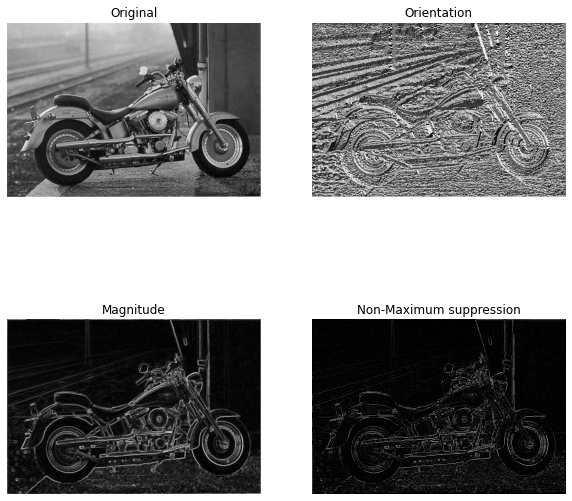

In [143]:
im3 = cv2.imread('/content/prewitt/motor.png',cv2.IMREAD_GRAYSCALE)
mag3, orient3 = magnitude(im3)
nms3 = non_max_supres(mag, orient3)

gray()

fig = plt.figure(figsize=(10, 10))
fig.add_subplot(2, 2, 1)
imshow(im3)
axis('off')
title('Original')

fig.add_subplot(2, 2, 2)
imshow(orient3)
axis('off')
title('Orientation')

fig.add_subplot(2, 2, 3)
imshow(mag3)
axis('off')
title('Magnitude')

fig.add_subplot(2, 2, 4)
imshow(nms3)
axis('off')
title('Non-Maximum suppression')

show()

<Figure size 432x288 with 0 Axes>

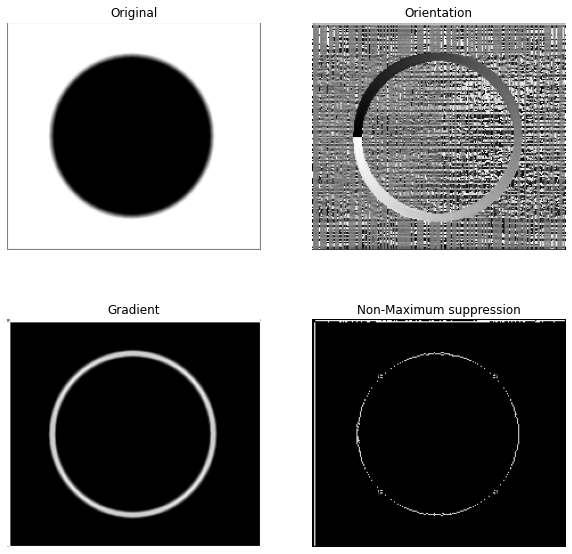

In [144]:
im = cv2.imread('/content/prewitt/circlegrey.png',cv2.IMREAD_GRAYSCALE)
mag, orient = magnitude(im)
nms = non_max_supres(mag, orient)

gray()

fig = plt.figure(figsize=(10, 10))
fig.add_subplot(2, 2, 1)
imshow(im)
axis('off')
title('Original')

fig.add_subplot(2, 2, 2)
imshow(orient)
axis('off')
title('Orientation')

fig.add_subplot(2, 2, 3)
imshow(mag)
axis('off')
title('Gradient')

fig.add_subplot(2, 2, 4)
imshow(nms)
axis('off')
title('Non-Maximum suppression')

show()

<Figure size 432x288 with 0 Axes>

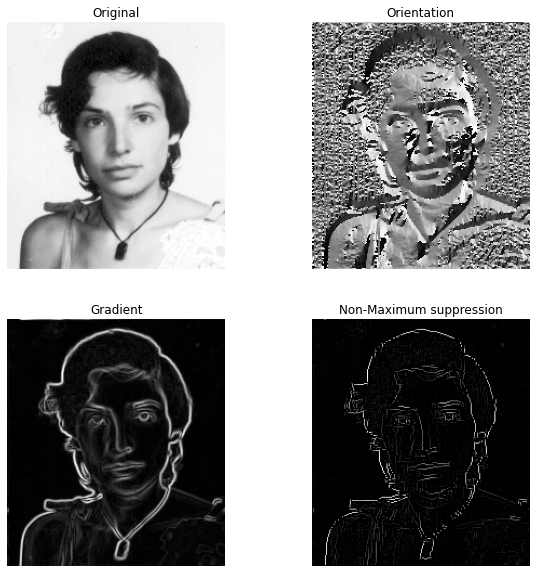

In [145]:
im2 = cv2.imread('/content/prewitt/julia.png',cv2.IMREAD_GRAYSCALE)
mag2, orient2 = magnitude(im2)
nms2 = non_max_supres(mag2, orient2)

gray()

fig = plt.figure(figsize=(10, 10))
fig.add_subplot(2, 2, 1)
imshow(im2)
axis('off')
title('Original')

fig.add_subplot(2, 2, 2)
imshow(orient2)
axis('off')
title('Orientation')

fig.add_subplot(2, 2, 3)
imshow(mag2)
axis('off')
title('Gradient')

fig.add_subplot(2, 2, 4)
imshow(nms2)
axis('off')
title('Non-Maximum suppression')

show()